## Final Project

**Purpose of the project：**

This project will try to scope on how the GDP and the population of California corresponds to the Income level. This project will try to establish a relationship between income level and economic growth by analyzing the data of the average household income, GDP and population in California.


**Project structure：**

The first part is the introduction of where the data comes from and how to access the data.

Second, the project will provide statistics on median household income in CA and illustrate how wealth is spread causing income equality over time. We will also provide a data report of the GDP growth in the content of the CA population.

Lastly, The project will provide further analysis by calculating and comparing the data and plotting it to identify relationships compared with the previous academic conclusions. 


**Data report：**

Overview of the data:

The data for this project comes from the Federal Reserve Economic Data website (FRED).
As mentioned above, their regional accounts data provides access to measures of economic activity in

-detailed date of mean and median household income and household income growth rate ratio data.

-GDP growth rate ratio and household income growth rate ratio.

The data can be accessed at https://fred.stlouisfed.org.



**Key Variables:**

The key series that I must retrieve is Median household income which is defined as :

“The median income is the income amount that divides a population into two equal groups, half having an income above that amount, and half having an income below that amount. It may differ from the mean (or average) income. The income that occurs most frequently is the income mode. Each of these is a way of understanding income distribution. Median income can be calculated by household income, by personal income, or for specific demographic groups.”
 
Besides, we will also use the CA GDP to see the relationship with the Median household income change rate and GDP is defined as:

Gross domestic product (GDP) is the standard measure of the value added created through the production of goods and services in a country during a certain period. As such, it also measures the income earned from that production, or the total amount spent on final goods and services (less imports).

And we will use the Human capital and Residents population in CA. to help us in the project.

Human capital: Human capital is an intangible asset or quality not listed on a company's balance sheet. It can be classified as the economic value of a worker's experience and skills. This includes assets like education, training, intelligence, skills, health, and other things employers value such as loyalty and punctuality.

Residents population: we will also download Resident Population in California. According to FRED, Population estimates are updated annually using current data on births, deaths, and migration to calculate population change since the most recent decennial census. The annual time series of estimates begins with the most recent decennial census data and extends to the vintage year. Each vintage of estimates includes all years since the most recent decennial census.


## Access Data

In [2]:
#Key Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

In [3]:
#Access Data
url = 'http://research.stlouisfed.org/fred2/series/MEHOINUSCAA646N/downloaddata/MEHOINUSCAA646N.csv'
data = pd.read_csv(url, parse_dates=True)
data.head() 

,DATE,VALUE
0,1984-01-01,25287
1,1985-01-01,26981
2,1986-01-01,29010
3,1987-01-01,30146
4,1988-01-01,30287


In [4]:
data.columns=['DATE','HOIN']

In [5]:
data.head()

,DATE,HOIN
0,1984-01-01,25287
1,1985-01-01,26981
2,1986-01-01,29010
3,1987-01-01,30146
4,1988-01-01,30287


In [6]:
#Summary Statistics for Median Household Income IN CA
data.describe()

,HOIN
count,36.000000
mean,47136.333333
std,13814.067271
min,25287.000000
25%,34695.500000
50%,47349.500000
75%,56354.000000
max,78105.000000


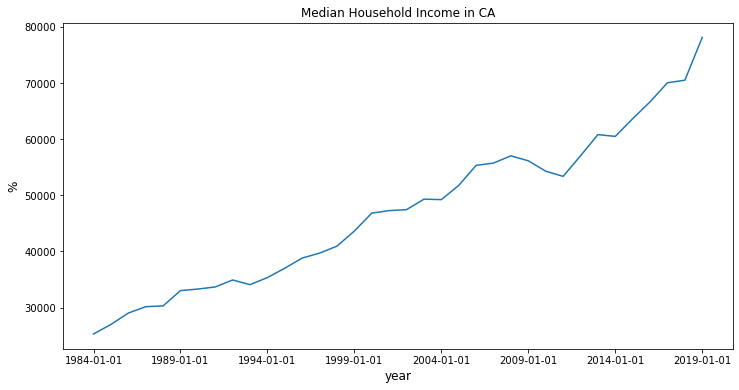

In [7]:
#Graphing Median Household Income in CA
data1=data.set_index('DATE')
ax = data1['1984':'2020'].plot(title='Median Household Income in CA', legend=False, figsize=(12,6))
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('%', fontsize=12)
plt.show()

In [8]:
url_c = 'http://research.stlouisfed.org/fred2/series/CANGSP/downloaddata/CANGSP.csv'
data_c = pd.read_csv(url_c, parse_dates=True)
data_c.head()

,DATE,VALUE
0,1997-01-01,1071327.2
1,1998-01-01,1147944.3
2,1999-01-01,1247734.4
3,2000-01-01,1366166.5
4,2001-01-01,1387551.8


In [9]:
data_c.columns=['DATE', 'GDP']

In [10]:
data_c.head()

,DATE,GDP
0,1997-01-01,1071327.2
1,1998-01-01,1147944.3
2,1999-01-01,1247734.4
3,2000-01-01,1366166.5
4,2001-01-01,1387551.8


In [11]:
#Summary Statistics for GDP
data_c.describe()

,GDP
count,2.300000e+01
mean,1.970110e+06
std,5.879731e+05
min,1.071327e+06
25%,1.484951e+06
50%,1.955321e+06
75%,2.330294e+06
max,3.132801e+06


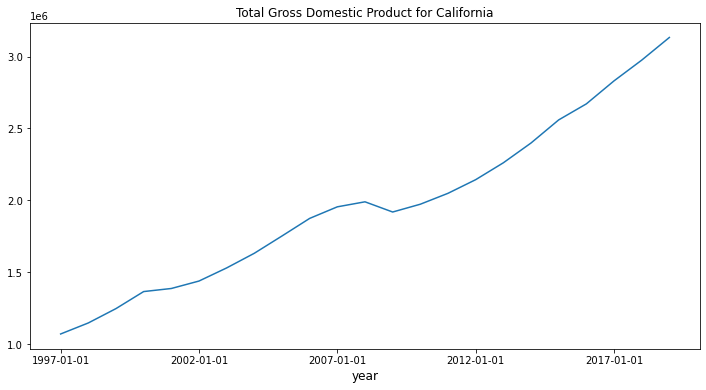

In [12]:
#Graphing Total Gross Domestic Product for California
data_c1=data_c.set_index('DATE')
ax = data_c1['1997':'2020'].plot(title='Total Gross Domestic Product for California', legend=False, figsize=(12,6))
ax.set_xlabel('year', fontsize=12)
plt.show()

In [13]:
#Access Data
url_r = 'http://research.stlouisfed.org/fred2/series/CAPOP/downloaddata/CAPOP.csv'
data_r = pd.read_csv(url, parse_dates=True)
data_r.head()

,DATE,VALUE
0,1984-01-01,25287
1,1985-01-01,26981
2,1986-01-01,29010
3,1987-01-01,30146
4,1988-01-01,30287


In [14]:
data_r.columns=['DATE','CAPOP']

In [15]:
data_r.head()

,DATE,CAPOP
0,1984-01-01,25287
1,1985-01-01,26981
2,1986-01-01,29010
3,1987-01-01,30146
4,1988-01-01,30287


In [16]:
#Summary Statistics for population
data_r.describe()

,CAPOP
count,36.000000
mean,47136.333333
std,13814.067271
min,25287.000000
25%,34695.500000
50%,47349.500000
75%,56354.000000
max,78105.000000


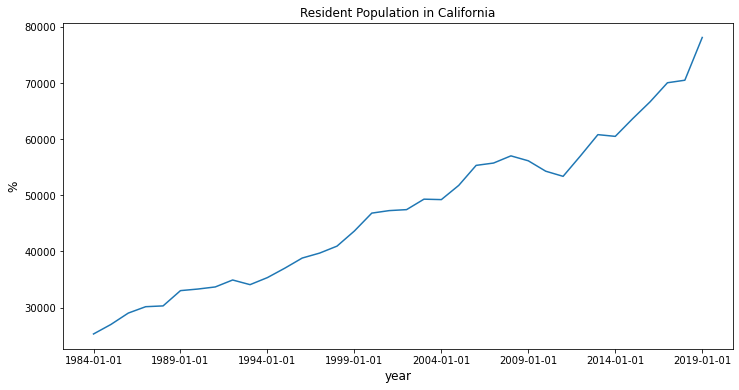

In [17]:
#Graphing the Resident Population in California
data_r1=data.set_index('DATE')
ax = data1['1900':'2020'].plot(title='Resident Population in California', legend=False, figsize=(12,6))
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('%', fontsize=12)
plt.show()

In [18]:
data_merge=pd.merge(data, data_c, how='inner', on='DATE', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [19]:
data_merge.head()

,DATE,HOIN,GDP
0,1997-01-01,39694,1071327.2
1,1998-01-01,40934,1147944.3
2,1999-01-01,43629,1247734.4
3,2000-01-01,46816,1366166.5
4,2001-01-01,47262,1387551.8


In [20]:
data_merge2=pd.merge(data_merge,data_r)
data_merge2.head()

,DATE,HOIN,GDP,CAPOP
0,1997-01-01,39694,1071327.2,39694
1,1998-01-01,40934,1147944.3,40934
2,1999-01-01,43629,1247734.4,43629
3,2000-01-01,46816,1366166.5,46816
4,2001-01-01,47262,1387551.8,47262


## Linear Regression Analysis



**PART1**


Looking for the relationship between the California median household income and the CA GDP.

Ha: the household income of CA displays a relationship with the California GDP level

H0: there is no correlation


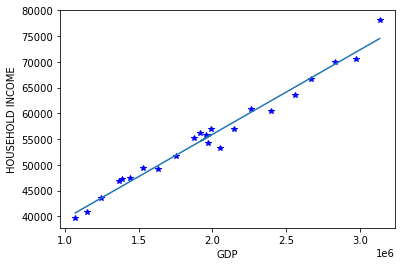

In [22]:
from numpy.polynomial.polynomial import polyfit
fig,ax=plt.subplots()
ax.plot(data_merge['GDP'],data_merge['HOIN'],'b*')
ax.set_xlabel("GDP")
ax.set_ylabel("HOUSEHOLD INCOME")
b,m=polyfit(data_merge['GDP'],data_merge['HOIN'],1)
ax.plot(data_merge['GDP'],b+m*data_merge['GDP'],'-')

In [50]:
m

0.01643391302802766

Regression analysis:

    We establish a positive relationship between CA household income and CA GDP.

In [51]:
from scipy.stats import linregress
gradient, intercept, r_value, p_value, std_err = linregress(data_merge['GDP'], data_merge['HOIN'])
gradient, intercept, std_err, p_value

(0.016433913028027654,
 23062.77719515773,
 0.0005604389340970252,
 1.5931120873184514e-18)


    The first regression results shows that the p value < 0.05 which indicates evidence against the null hypothesis,so we establish a weak positive relationship setween household income and GDP, even though we find the results to not be statistically significant. 

**PART2**

Looking for the relationship between the California median household income and the CA population.

Ha: the household income of CA displays a relationship with the California population.

H0: there is no correlation


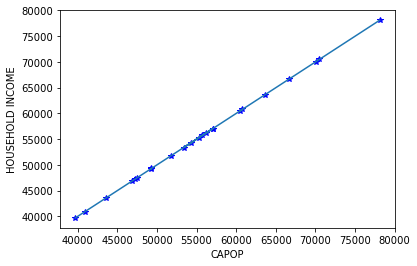

In [60]:
from numpy.polynomial.polynomial import polyfit
fig,ax=plt.subplots()
ax.plot(data_merge2['CAPOP'],data_merge['HOIN'],'b*')
ax.set_xlabel("CAPOP")
ax.set_ylabel("HOUSEHOLD INCOME")
b,m=polyfit(data_merge2['CAPOP'],data_merge['HOIN'],1)
ax.plot(data_merge2['CAPOP'],b+m*data_merge['HOIN'],'-')

In [61]:
m

1.0000000000000004

Regression analysis:
    
    We establish a positive relationship between CA household income and the California population.

In [64]:
from scipy.stats import linregress
gradient, intercept, r_value, p_value, std_err = linregress(data_merge2['CAPOP'], data_merge['HOIN'])
gradient, intercept, std_err, p_value

(1.0, 0.0, 0.0, 2.491593245473548e-208)

    From the second regression results, we establish a strong positive relationship between the CA household income and CA population that as the population increases, Household income increases.

## Orinary Least Squares

In [80]:
data_merge2['const'] = 1
reg1 = sm.OLS(endog=data_merge2['HOIN'], exog=data_merge2[['const', 'GDP','CAPOP']], \
    missing='drop')
type(reg1)

statsmodels.regression.linear_model.OLS

In [81]:
results = reg1.fit()
type(results)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [82]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   HOIN   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.210e+28
Date:                Thu, 10 Dec 2020   Prob (F-statistic):          2.63e-279
Time:                        02:46:58   Log-Likelihood:                 494.22
No. Observations:                  23   AIC:                            -982.4
Df Residuals:                      20   BIC:                            -979.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.91e-11   4.03e-10      0.072      0.9

**Discussion:**


Based on our OLS regression result, we have positive coefficient of 1 for population. This implys that Household Income are impact largely by population. Since R2 of 1 indicates that the regression predictions perfectly fit the data. And we have coefficient -6.245e^-17 for GDP, it implys that GDP have negative relationship with Household Income.
To be more specific, coefficient between population and Household Income equal to 1 and p-value for population p = 0.000 indicate that population has significant impact on household income.  And the p-value for GDP is p=0.828 which is greater than 0.05. It indicates that GDP has less impact on Household Income. In the previous data, we have positive relationship between GDP and Household Income but the relationship is weak. Thus, here the relationship between GDP and Household Income is negative might be influence by lots of other perscepectives. It also could result from multicollinearity.